In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Step 1: Import Libraries and Load Data

In [2]:
data = pd.read_csv('customer.csv')
data.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [ ]:
# Step 2: Data Exploration
# Exploring the data helps us understand its structure and content.

# Understand the Data Structure: Use the shape() function.
# Summary Statistics: Use the describe() function to understand central tendency, dispersion, and distribution shape.
# Missing Values: Check for completeness.
# Data Distribution: Visualize key features to understand their distributions.

In [3]:
data.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [5]:
data.shape

(1000, 9)

In [6]:
data.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


In [ ]:
# Step 3: Data Preprocessing
# Preprocessing is essential for accurate analysis and modeling. It includes:

# Handling Missing Values: We have no missing values in our dataset.
# Removing Duplicates: Ensure no duplicate entries.
# Scaling Numerical Data: Improves model performance, especially for algorithms sensitive to feature scales.
# Encoding Categorical Data:
# One-Hot Encoding: Converts categorical variables into binary vectors.
# Label Encoding: Converts categorical labels into numeric values.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [16]:
data.dtypes

,0
id,int64
age,int64
gender,object
income,int64
spending_score,int64
membership_years,int64
purchase_frequency,int64
preferred_category,object
last_purchase_amount,float64


<ipython-input-42-9c879395e1c9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchase = data.groupby('age_group')['last_purchase_amount'].sum().reset_index()


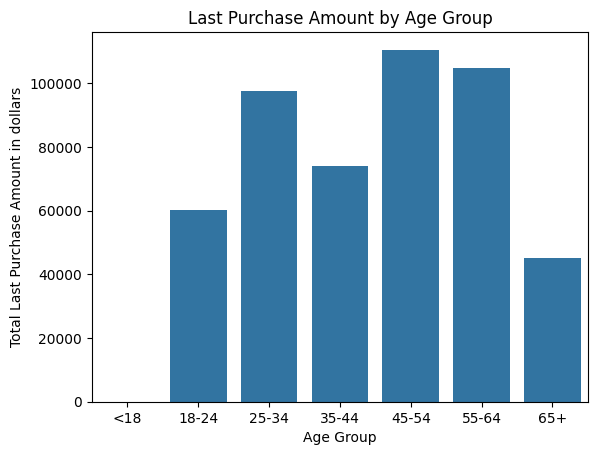

In [42]:

age_group_purchase = data.groupby('age_group')['last_purchase_amount'].sum().reset_index()

sns.barplot(x='age_group', y='last_purchase_amount', data=age_group_purchase)
plt.title('Last Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Last Purchase Amount in dollars')
plt.show()

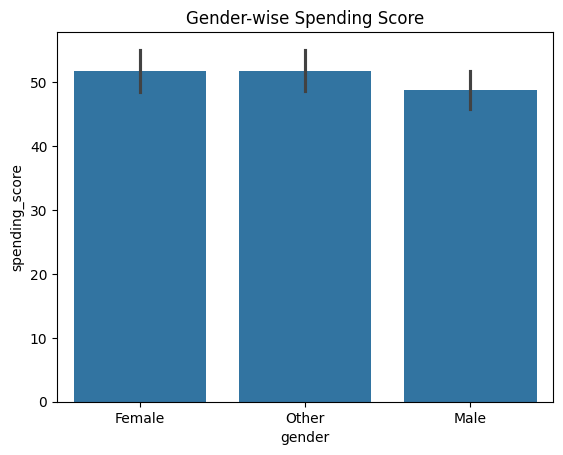

In [19]:
sns.barplot(x='gender', y='spending_score', data=data)
plt.title('Gender-wise Spending Score')
plt.show()


In [22]:
purchase_frequency = data.groupby(['gender'])['purchase_frequency'].mean().reset_index()

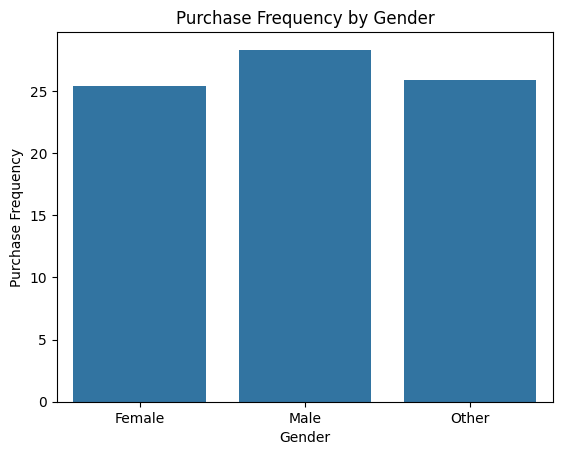

In [23]:
sns.barplot(x='gender', y='purchase_frequency', data=purchase_frequency)
plt.title('Purchase Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Frequency')
plt.show()

(-1.099992409380005,
 1.0999977211996428,
 -1.0999952914293452,
 1.0999997757823499)

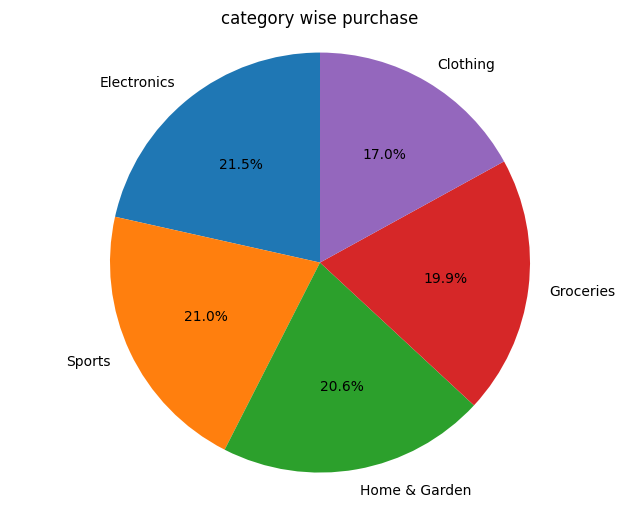

In [25]:
category_counts = data['preferred_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('category wise purchase')
plt.axis('equal')

<ipython-input-41-016540d387fa>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchase = data.groupby('age_group')['last_purchase_amount'].sum().reset_index()


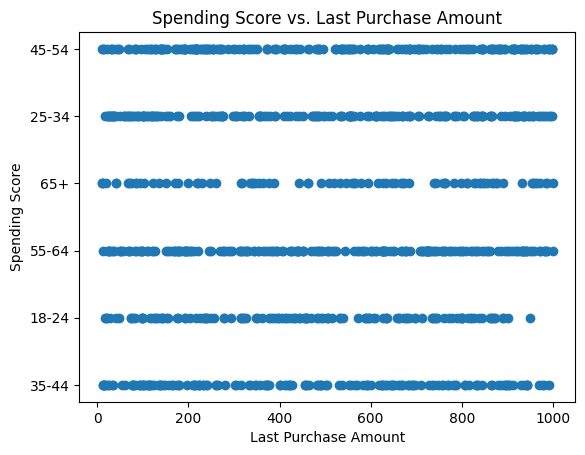

In [41]:
age_group_purchase = data.groupby('age_group')['last_purchase_amount'].sum().reset_index()
plt.scatter(data['last_purchase_amount'],data['age_group'])
plt.title('Spending Score vs. Last Purchase Amount')
plt.ylabel('Spending Score')
plt.xlabel('Last Purchase Amount')

plt.show()

In [57]:
max_purchase_by_gender = data.groupby('gender')['last_purchase_amount'].sum().reset_index()

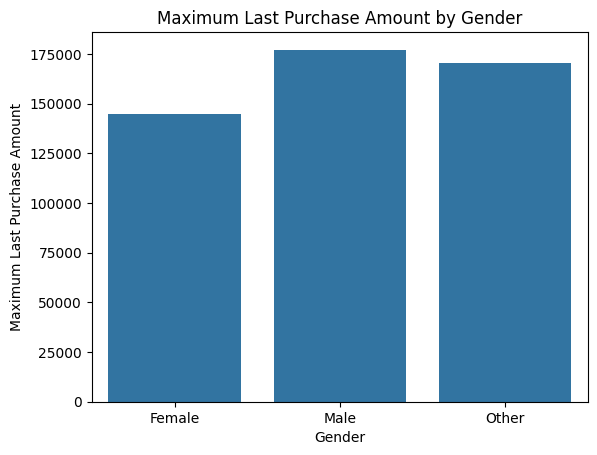

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='gender', y='last_purchase_amount', data=max_purchase_by_gender)
plt.title('Maximum Last Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Maximum Last Purchase Amount')
plt.show()

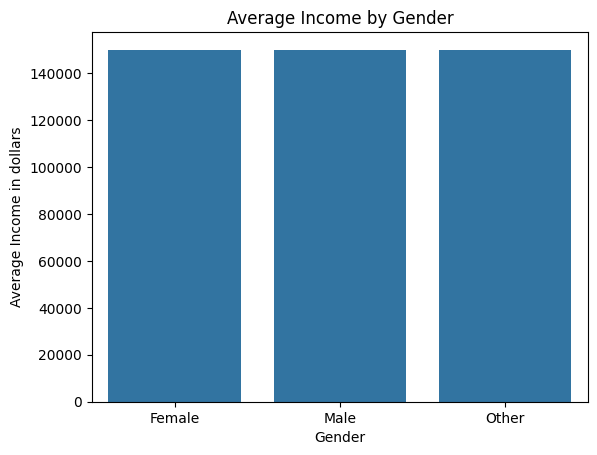

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


gender_income = data.groupby('gender')['income'].max().reset_index()
sns.barplot(x='gender', y='income', data=gender_income)
plt.title('Average Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Income in dollars')
plt.show()

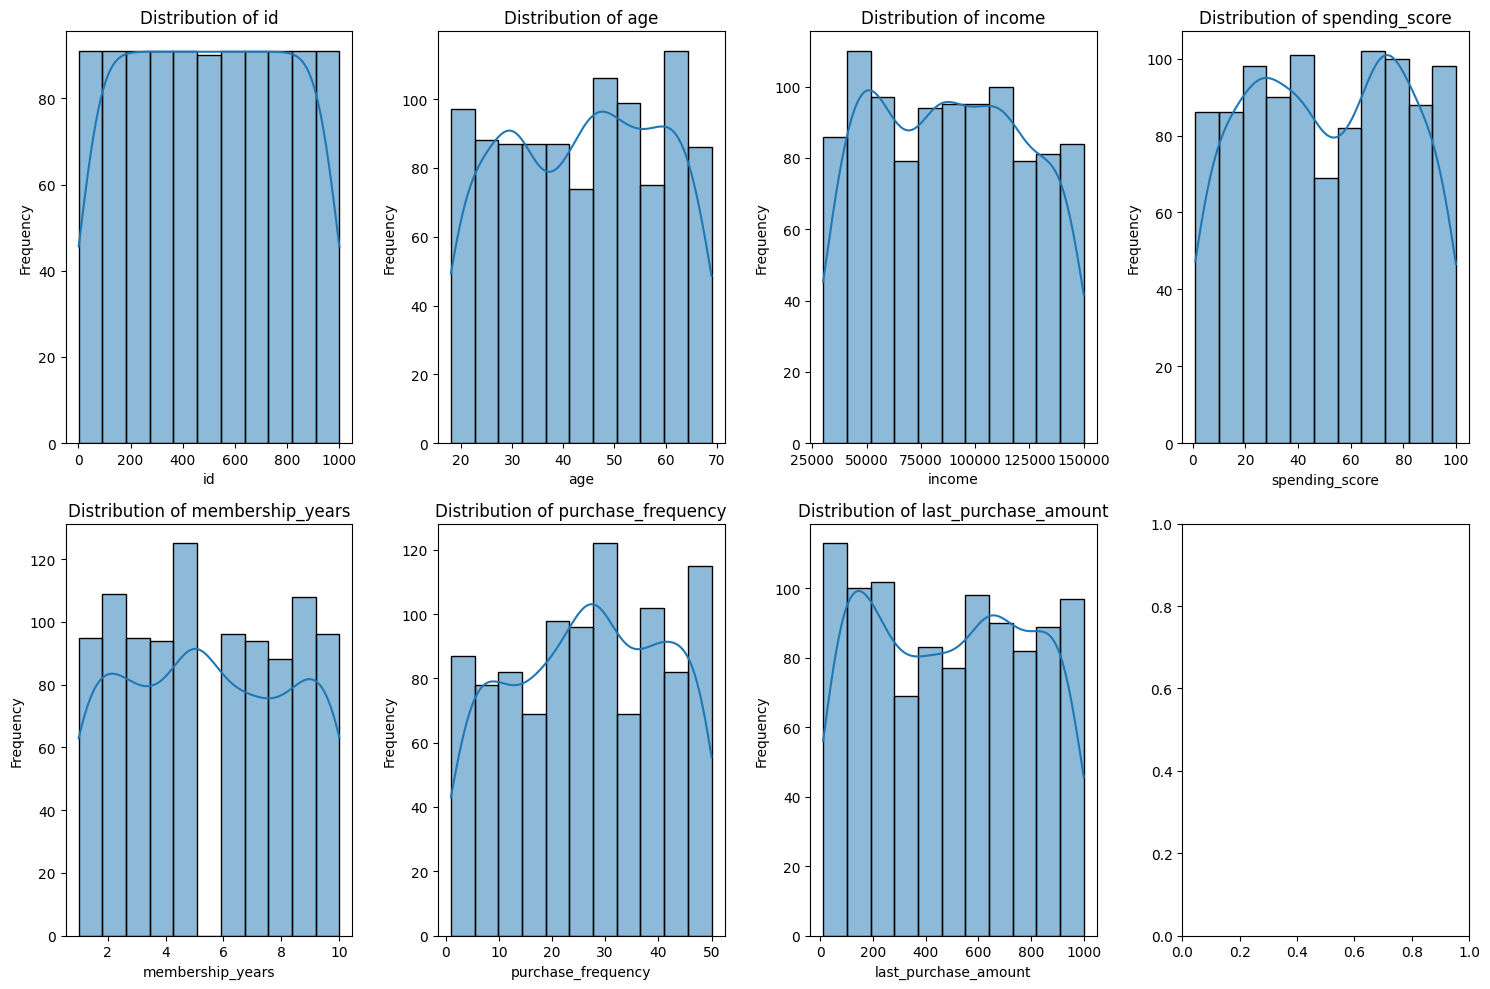

In [74]:

numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [83]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

ValueError: could not convert string to float: '35-44'

<Figure size 2000x1000 with 0 Axes>

In [85]:
data.head()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,age_group,gender_encoded,preferred_category_encoded
0,1,38,99342,90,3,24,113.53,35-44,0,2
1,2,21,78852,60,2,42,41.93,18-24,0,4
2,3,60,126573,30,2,28,424.36,55-64,0,0
3,4,40,47099,74,9,5,991.93,35-44,2,3
4,5,65,140621,21,3,25,347.08,65+,0,1


In [90]:
data = data.drop('age_group', axis=1)

<Axes: >

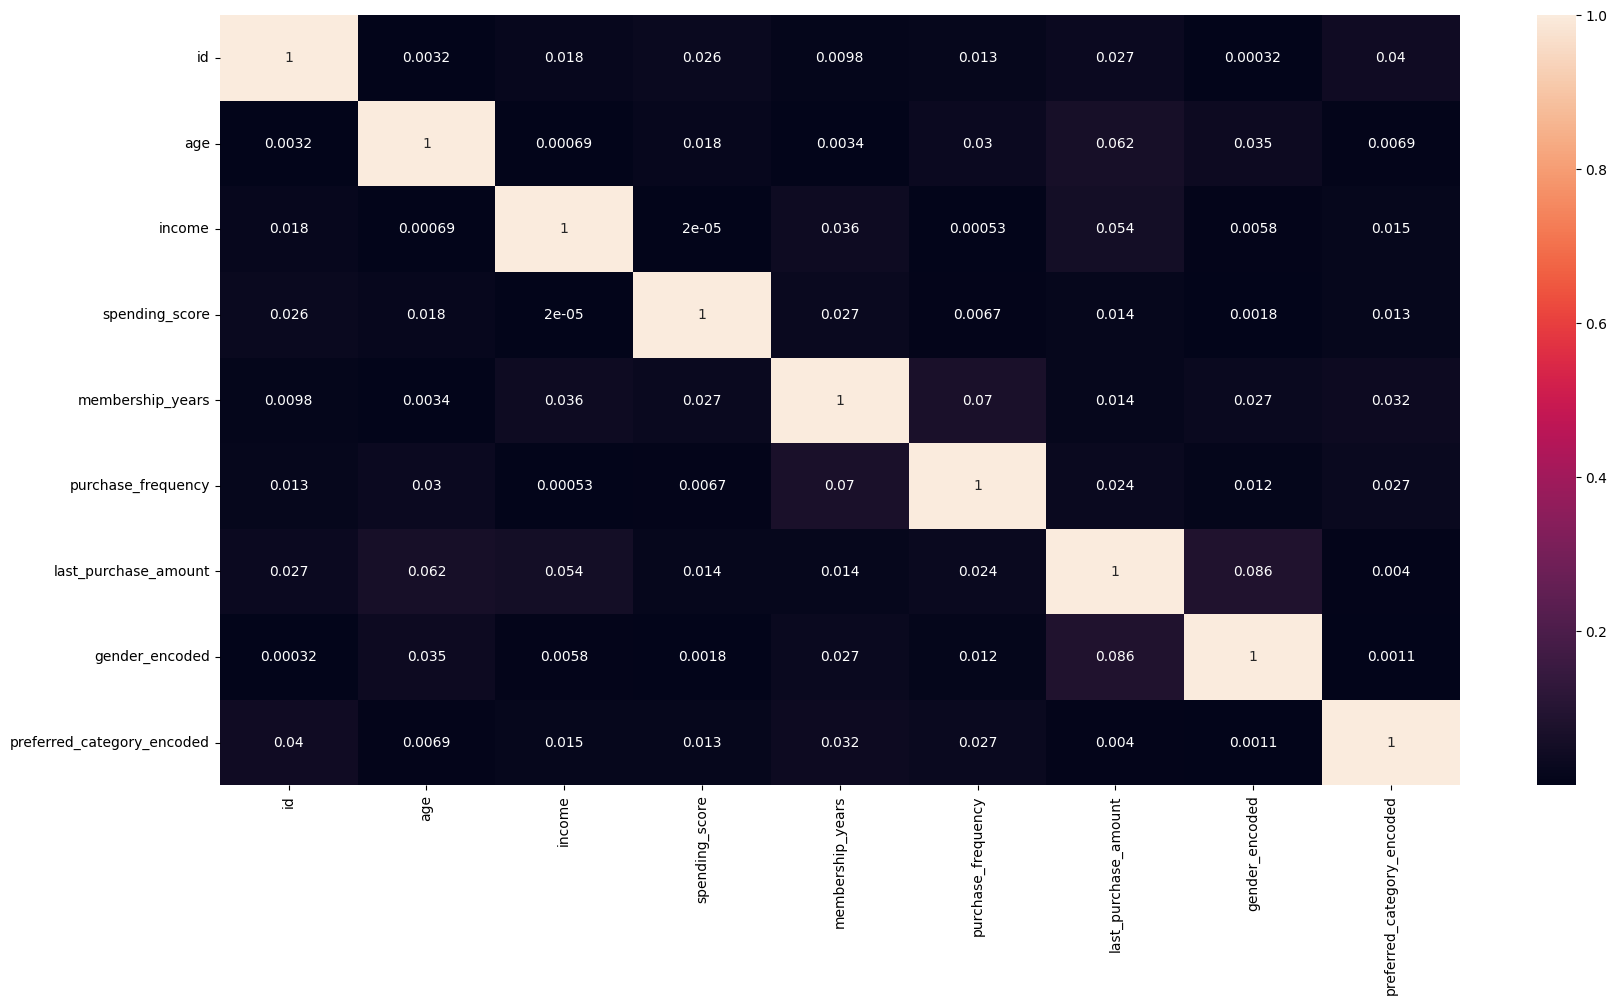

In [91]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [93]:
sns.pairplot(data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [95]:
#check and remove duplicates
data.drop_duplicates(inplace=True)